In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np

warnings.filterwarnings("ignore")

data=pd.read_csv(r'C:\Guvi_final_project\Course Rating Prediction\3.1-data-sheet-guvi-courses.csv').dropna()
data=data.reset_index(drop=True)
print(data.shape)

(3676, 12)


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3676 entries, 0 to 3675
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3676 non-null   float64
 1   course_title         3676 non-null   object 
 2   url                  3676 non-null   object 
 3   price                3676 non-null   float64
 4   num_subscribers      3676 non-null   float64
 5   num_reviews          3676 non-null   float64
 6   num_lectures         3676 non-null   float64
 7   level                3676 non-null   object 
 8   Rating               3676 non-null   float64
 9   content_duration     3676 non-null   float64
 10  published_timestamp  3676 non-null   object 
 11  subject              3676 non-null   object 
dtypes: float64(7), object(5)
memory usage: 344.8+ KB


In [3]:
data.head()

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
0,41295.0,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.5,2013-02-14T07:03:41Z,Subject: Web Development
1,59014.0,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.5,2013-06-09T15:51:55Z,Subject: Web Development
2,625204.0,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.0,2015-11-02T21:13:27Z,Subject: Web Development
3,173548.0,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.0,2014-04-08T16:21:30Z,Subject: Web Development
4,764164.0,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.5,2016-03-08T22:28:36Z,Subject: Web Development


In [4]:
cols=data.columns
for col in cols:
    print('Total Unique ['+ col + '] = ' + str(len(data[col].unique())))

Total Unique [course_id] = 3672
Total Unique [course_title] = 3663
Total Unique [url] = 3672
Total Unique [price] = 38
Total Unique [num_subscribers] = 2197
Total Unique [num_reviews] = 511
Total Unique [num_lectures] = 229
Total Unique [level] = 4
Total Unique [Rating] = 101
Total Unique [content_duration] = 105
Total Unique [published_timestamp] = 3672
Total Unique [subject] = 4


In [5]:
data=data.drop('course_id',axis=1)
data=data.drop('course_title',axis=1)
data=data.drop('url',axis=1)
data=data.drop('published_timestamp',axis=1)

In [6]:
from sklearn.preprocessing import OneHotEncoder

columns_to_encode = ['level', 'subject']
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(data[columns_to_encode])
encoded_data = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(columns_to_encode))

data=data.drop(columns=columns_to_encode, axis=1)
encoded_data = pd.concat([data, encoded_data], axis=1)

In [7]:
encoded_data.skew()

price                                1.156255
num_subscribers                     11.591336
num_reviews                         17.813368
num_lectures                         4.870835
Rating                              -0.467674
content_duration                     5.427303
level_All Levels                    -0.094813
level_Beginner Level                 0.648873
level_Expert Level                   7.774617
level_Intermediate Level             2.417717
subject_Business Finance             0.752476
subject_Graphic Design               1.817923
subject_Musical Instruments          1.623269
subject_Subject: Web Development     0.736607
dtype: float64

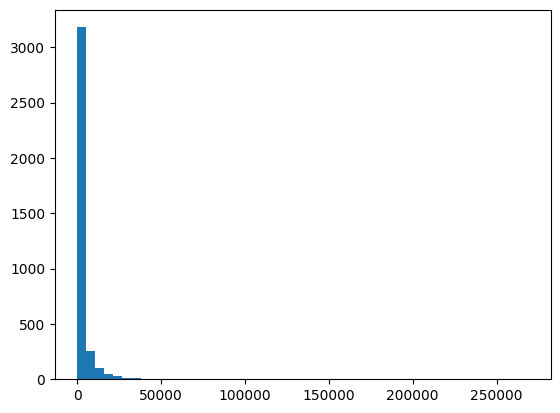

In [8]:
plt.hist(encoded_data['num_subscribers'],bins=50)
plt.show()

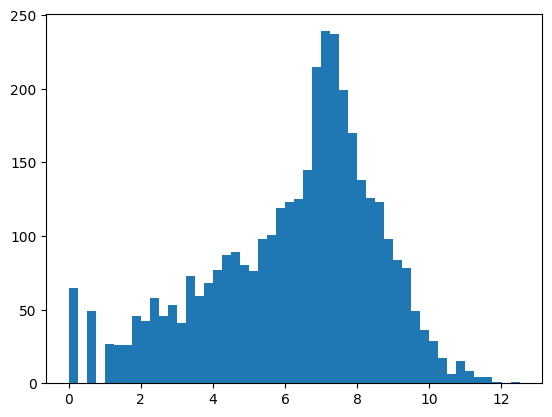

In [9]:
plt.hist((encoded_data['num_subscribers']+1).apply(lambda x: np.log(x)),bins=50)
plt.show()

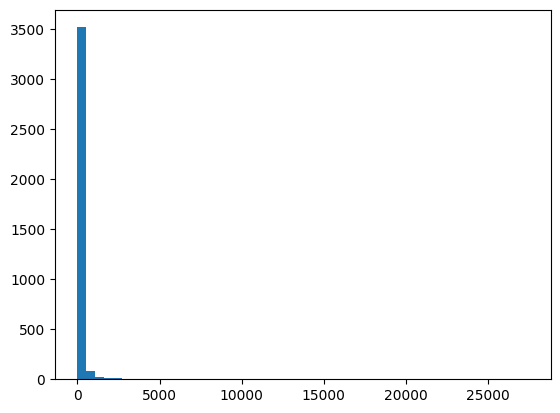

In [10]:
plt.hist(encoded_data['num_reviews'],bins=50)
plt.show()

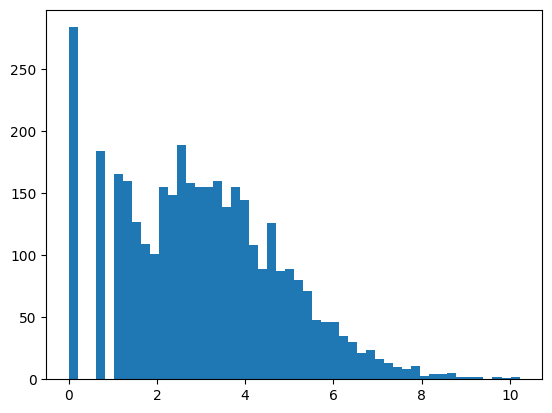

In [11]:
plt.hist((encoded_data['num_reviews']+1).apply(lambda x: np.log(x)),bins=50)
plt.show()

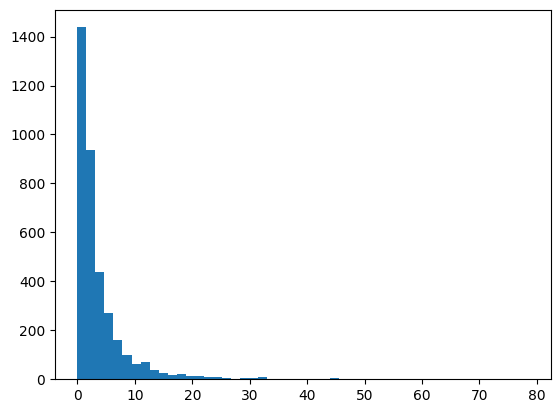

In [12]:
plt.hist(encoded_data['content_duration'],bins=50)
plt.show()

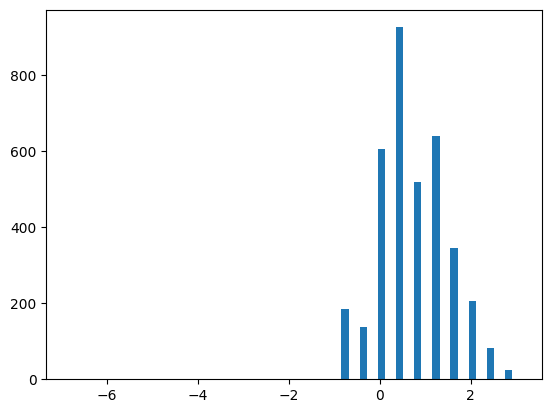

In [13]:
from scipy import stats
plt.hist(stats.boxcox(encoded_data['content_duration']+0.01),bins=25)
plt.show()

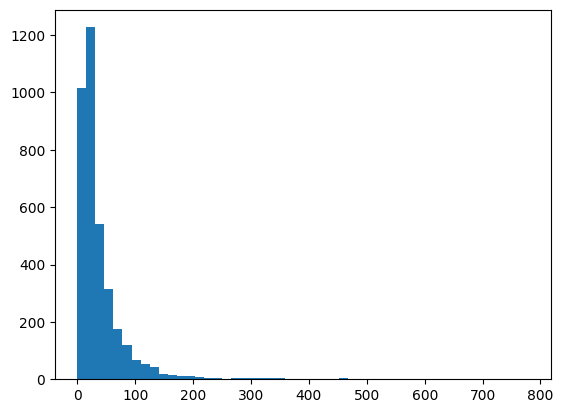

In [14]:
plt.hist(encoded_data['num_lectures'],bins=50)
plt.show()

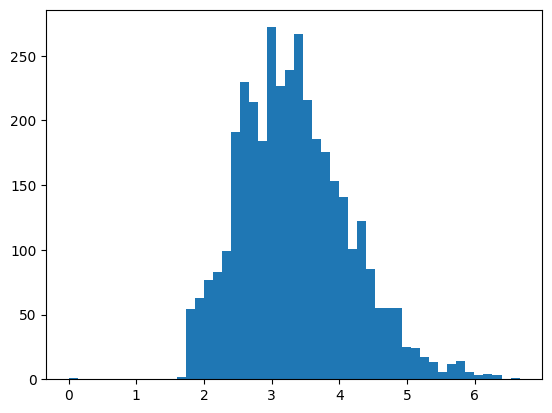

In [15]:
plt.hist((encoded_data['num_lectures']+1).apply(lambda x: np.log(x)),bins=50)
plt.show()

In [16]:
encoded_data['num_subscribers']=(encoded_data['num_subscribers']+1).apply(lambda x: np.log(x))
encoded_data['num_reviews']=(encoded_data['num_reviews']+1).apply(lambda x: np.log(x))
encoded_data['content_duration']=pd.Series(stats.boxcox(encoded_data['content_duration']+0.01)[0])
encoded_data['num_lectures']=(encoded_data['num_lectures']+1).apply(lambda x: np.log(x))

In [17]:
encoded_data.skew()

price                               1.156255
num_subscribers                    -0.635257
num_reviews                         0.399998
num_lectures                        0.519015
Rating                             -0.467674
content_duration                   -0.054055
level_All Levels                   -0.094813
level_Beginner Level                0.648873
level_Expert Level                  7.774617
level_Intermediate Level            2.417717
subject_Business Finance            0.752476
subject_Graphic Design              1.817923
subject_Musical Instruments         1.623269
subject_Subject: Web Development    0.736607
dtype: float64

In [18]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

scaled_data = scaler.fit_transform(encoded_data)
data = pd.DataFrame(scaled_data, columns=encoded_data.columns)

In [19]:
Y=encoded_data['Rating']
X=data.drop('Rating',axis=1)

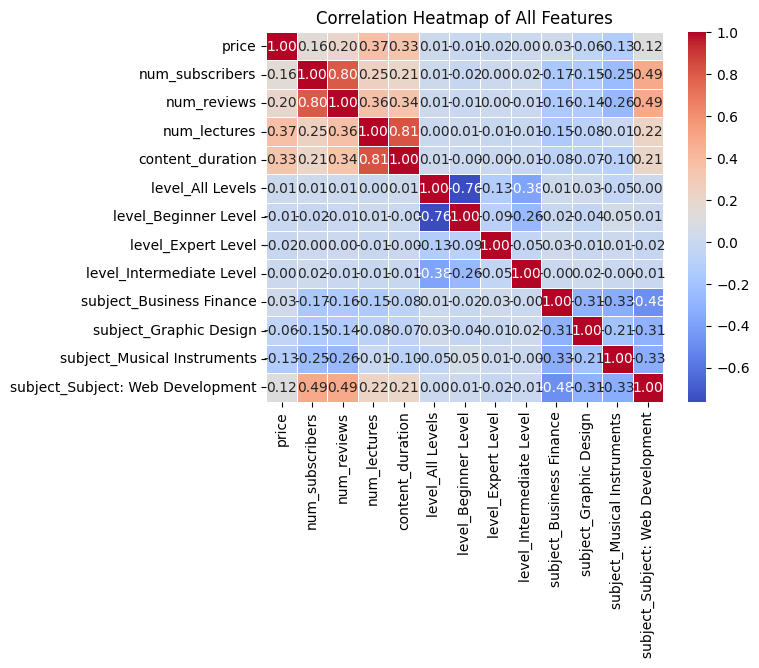

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of All Features')
plt.show()

In [21]:
data.corr()['Rating']

price                               0.031643
num_subscribers                    -0.003197
num_reviews                        -0.007643
num_lectures                       -0.055569
Rating                              1.000000
content_duration                   -0.011276
level_All Levels                    0.026676
level_Beginner Level               -0.029473
level_Expert Level                 -0.007840
level_Intermediate Level            0.005244
subject_Business Finance            0.164633
subject_Graphic Design              0.158236
subject_Musical Instruments        -0.430395
subject_Subject: Web Development    0.067156
Name: Rating, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
import time

start_time = time.time()

X_train , X_test , Y_train , Y_test = train_test_split(
    X , Y , test_size=0.2 , random_state=42
    )

model=GradientBoostingRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [8, 10,15,20]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, Y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Y_pred = best_model.predict(X_test)

r2 = r2_score(Y_test , Y_pred)
print(r2)

end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

Best hyperparameters: {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 200}
0.3393162654267248
Execution time: 359.53325629234314 seconds


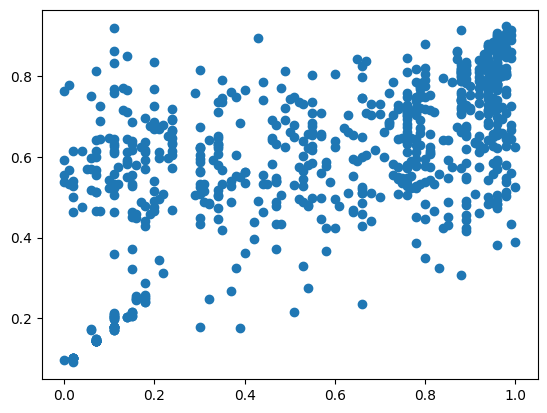

In [23]:
plt.scatter(Y_test,Y_pred)
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
import time

start_time = time.time()

X_train , X_test , Y_train , Y_test = train_test_split(
    X , Y , test_size=0.2 , random_state=42
    )

model=AdaBoostRegressor(base_estimator=RandomForestRegressor(), random_state=42)

param_grid = {
    'n_estimators': [100],
    'learning_rate': [0.001],
    'base_estimator': [RandomForestRegressor(max_depth=15,min_samples_split=10), RandomForestRegressor(max_depth=20,min_samples_split=10)]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, Y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Y_pred = best_model.predict(X_test)

r2 = r2_score(Y_test , Y_pred)
print(r2)

end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

Best hyperparameters: {'base_estimator': RandomForestRegressor(max_depth=20, min_samples_split=10), 'learning_rate': 0.001, 'n_estimators': 100}
0.3706567575431674
Execution time: 1540.2540020942688 seconds


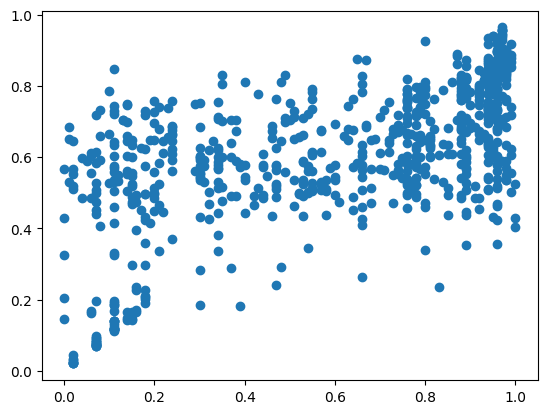

In [27]:
plt.scatter(Y_test,Y_pred)
plt.show()

In [47]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import numpy as np
import time

start_time = time.time()

degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

X_train , X_test , Y_train , Y_test = train_test_split(
    X , Y , test_size=0.2 , random_state=42
    )

polyreg.fit(X_train, Y_train)

Y_pred = polyreg.predict(X_test)

r2 = r2_score(Y_test , Y_pred)
print(r2)

end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

0.17106278641848915
Execution time: 0.03587532043457031 seconds


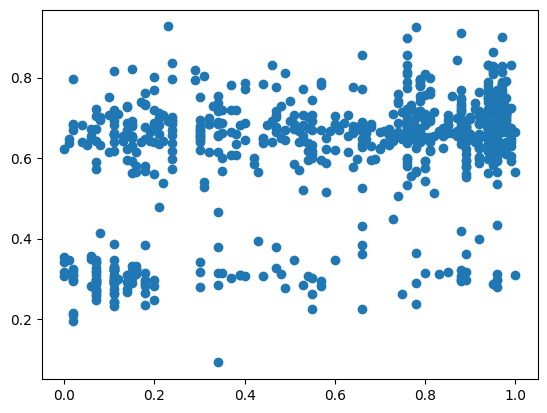

In [48]:
plt.scatter(Y_test,Y_pred)
plt.show()